In [1]:
pip install fafbseg

  Using cached fafbseg-3.1.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached caveclient-7.7.4-py3-none-any.whl.metadata (2.8 kB)
  Using cached cloud_volume-12.2.0-py3-none-any.whl.metadata (53 kB)
  Using cached diskcache-5.6.3-py3-none-any.whl.metadata (20 kB)
  Using cached fastremap-1.16.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (10 kB)
  Using cached inquirer-3.4.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached navis-1.10.0-py3-none-any.whl.metadata (15 kB)
  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pyarrow-20.0.0-cp313-cp313-macosx_12_0_arm64.whl.metadata (3.3 kB)
  Using cached pyperclip-1.9.0-py3-none-any.whl
  Using cached python_catmaid-2.4.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached requests_futures-1.0.2-py2.py3-none-any.whl.metadata (12 kB)
  Using cached skeletor-1.3.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached tqdm-4.67.1-py3-none-an

In [6]:
pip install flybrains

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import fafbseg.flywire as flywire
import navis
import flybrains

In [ ]:
from fafbseg import flywire
# flywire.set_chunkedgraph_secret()

# read in csv
vm7d_osn = pd.read_csv('vm7d_osn.csv')
vm7d_pn = pd.read_csv('vm7d_pn.csv')

vm2_osn = pd.read_csv('vm2_osn.csv')
vm2_pn = pd.read_csv('vm2_pn.csv')

lLN2F_b = pd.read_csv('lLN2F_b.csv')
lLN2P = pd.read_csv('lLN2P.csv')
lLN2T =  pd.read_csv('lLN2T.csv')
il3LN6 = pd.read_csv('il3LN6.csv')


brain = flybrains.FLYWIRE

Token succesfully stored.


In [9]:
# get skeletons
vm7d_orn_skeletons = flywire.get_skeletons(vm7d_osn.root_id)
vm7d_pn_skeletons = flywire.get_skeletons(vm7d_pn.root_id)

vm2_orn_skeletons = flywire.get_skeletons(vm2_osn.root_id)
vm2_pn_skeletons = flywire.get_skeletons(vm2_pn.root_id)

lLN2F_b_skeletons = flywire.get_skeletons(lLN2F_b.pre_id)
lLN2P_skeletons = flywire.get_skeletons(lLN2P.pre_id)
lLN2T_skeletons = flywire.get_skeletons(lLN2T.pre_id)
il3LN6_skeletons = flywire.get_skeletons(il3LN6.pre_id)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [5]:
# assign colors
neuron_types = {
    "VM7d ORNs": (vm7d_orn_skeletons, '#278943'),
    "VM7d PNs": (vm7d_pn_skeletons, '#ffcd05'),
    "VM2 ORNs": (vm2_orn_skeletons, '#278943'),
    "VM2 PNs": (vm2_pn_skeletons, '#ffcd05'),
    "lLN2F_b": (lLN2F_b_skeletons, '#00008B'),
    "lLN2P": (lLN2P_skeletons, '#6495ED'),
    "lLN2T": (lLN2T_skeletons, '#00F5FF'),
    "il3LN6": (il3LN6_skeletons, '#00BFFF')
}

Plot neurons:  94%|█████████▍| 31/33 [00:01<00:00, 22.84it/s]WARNING : Neuron 720575940649098105 appears to have 5 somas. Skipping plotting its somas. (navis)


Saved vm7d_orns_20250520_010811.eps


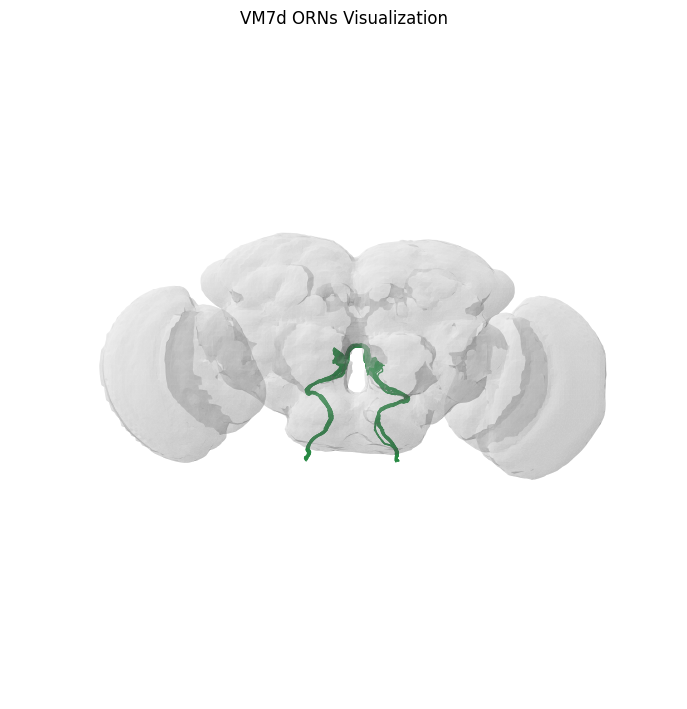

Saved vm7d_pns_20250520_010859.eps


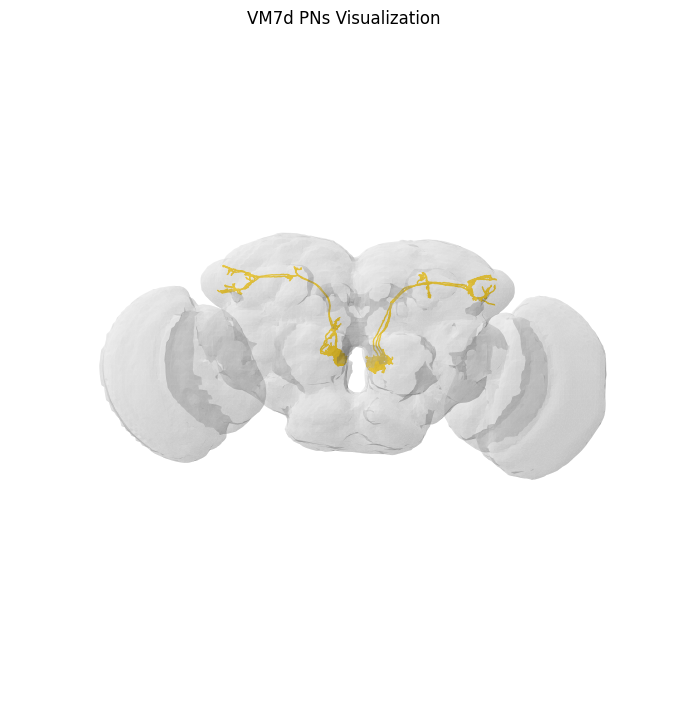

Saved vm2_orns_20250520_010943.eps


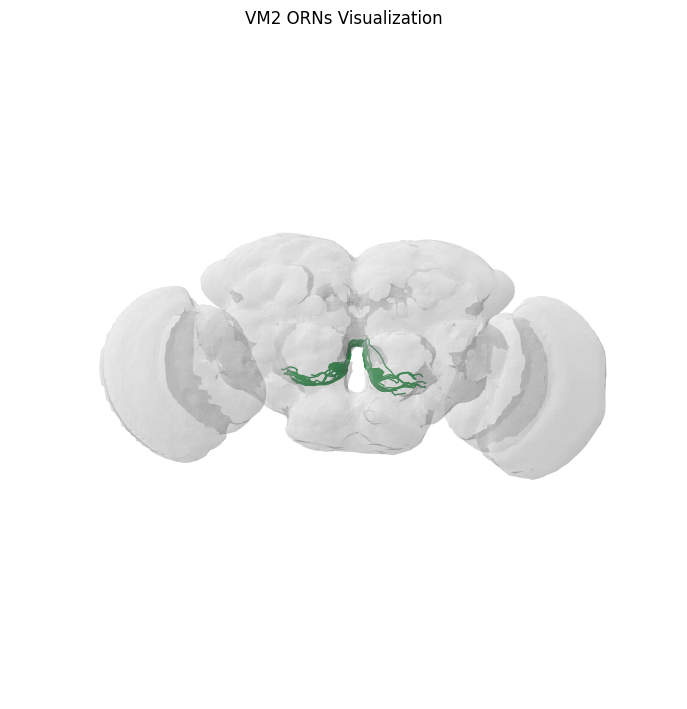

Saved vm2_pns_20250520_011025.eps


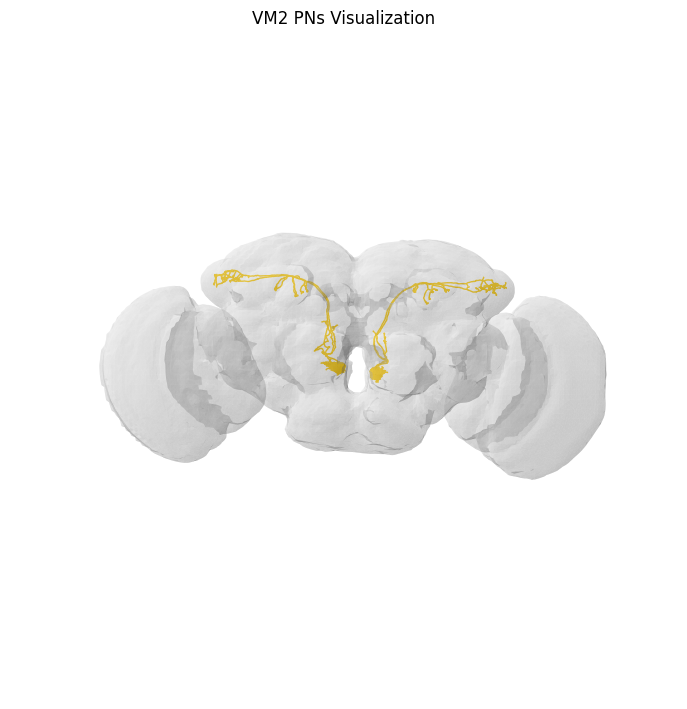

Saved lln2f_b_20250520_011106.eps


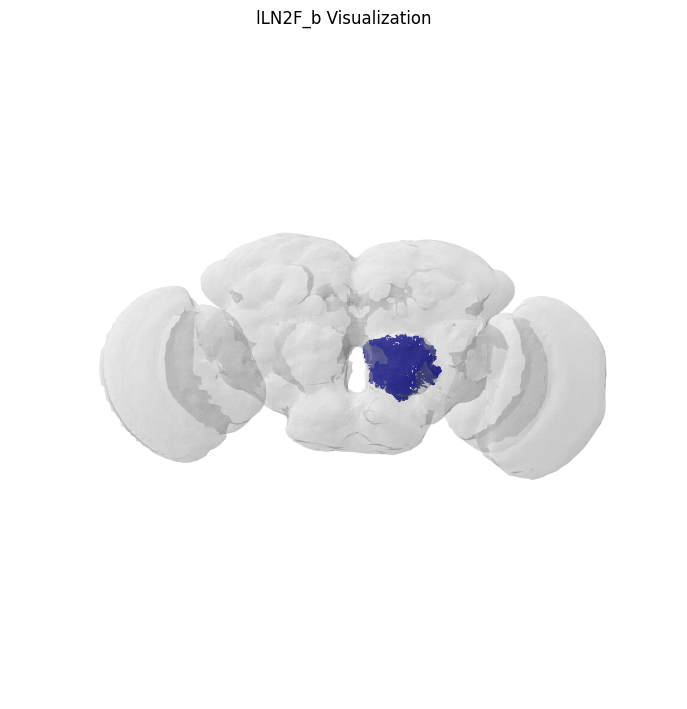

Saved lln2p_20250520_011150.eps


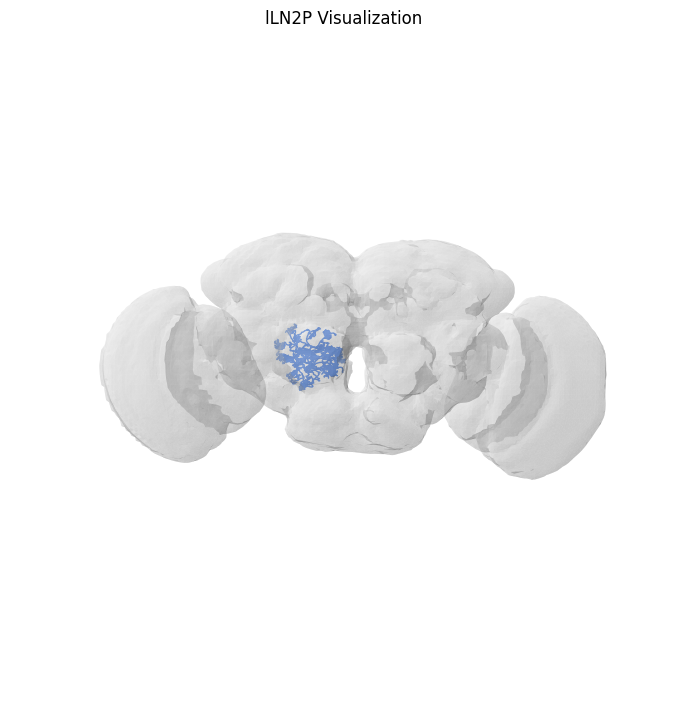

Saved lln2t_20250520_011227.eps


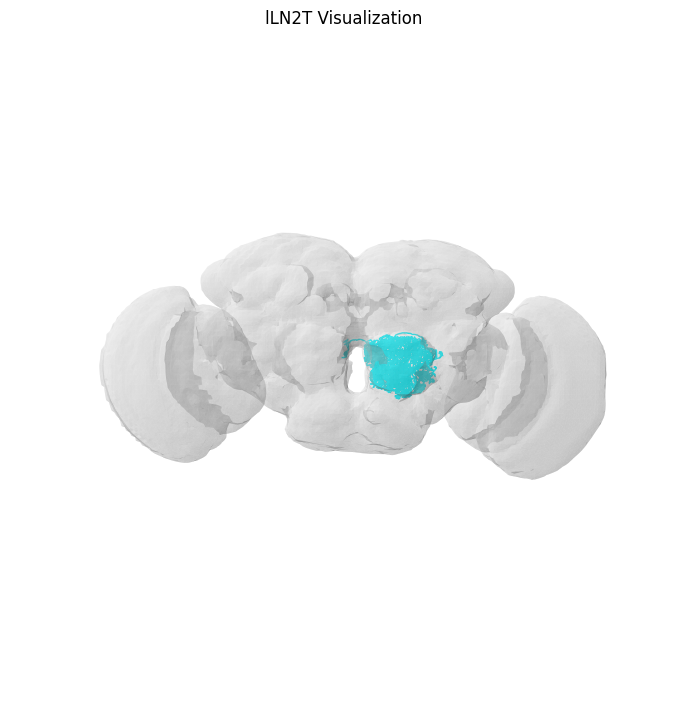

Saved il3ln6_20250520_011312.eps


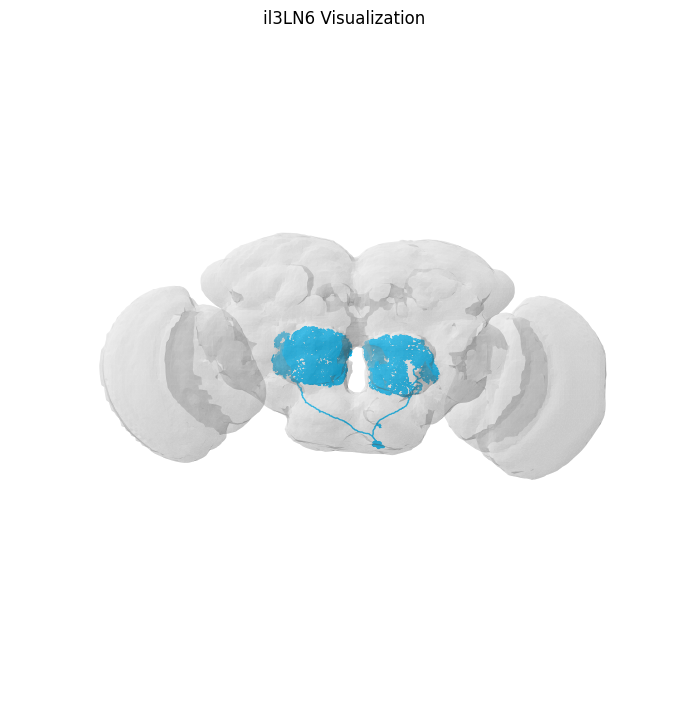

In [ ]:
for name, (skeletons, color) in neuron_types.items():

    # plot skeleton and turn off axes completely
    fig, ax = navis.plot2d([skeletons, brain], color=color, view=("x", "-y"), method="3d_complex")
    ax.set_axis_off()
    ax.grid(False)
    ax.set_title(f"{name} Visualization")

    # adjust layout for better visualization
    plt.tight_layout()

    # create unique filename with a timestamp
    import datetime
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    safe_name = name.replace(' ', '_').replace('/', '_').replace('\\', '_').lower()
    filename = f"{safe_name}_{timestamp}.svg"

    # save figure as an EPS file
    plt.savefig(filename, format='svg', dpi=300, bbox_inches='tight')
    print(f"Saved {filename}")

    # display plot
    plt.show()

    # close figure
    plt.close(fig)